La parte commentata è un metodo molto lento per estrarre tutte le GraphInstances di grafi originali e controfattuali.  
Quando capiamo bene cosa ci serve, la sistemo.  
Momentaneamente, queste info sono salvate in "utils_martina\prova.pkl". Partire direttamente dalla sezione "Ripartire da qui"

### Cose

In [ ]:
"""
import re
import pickle

import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

from utils_martina.my_utils import *
"""

In [ ]:
"""
eval_manager_path = "..\\..\\explainability\GRETEL-repo\\output\\eval_manager\\"
embeddings_path = "..\\..\\explainability\GRETEL-repo\\output\\embeddings\\"
"""

In [ ]:
"""
# Load eval_manager
most_recent_file_name = get_most_recent_file(eval_manager_path)
print(most_recent_file_name)

with open(eval_manager_path + most_recent_file_name, 'rb') as f:
    eval_manager = pickle.load(f)
"""

12200-Martina.pkl


In [ ]:
"""
def evaluate_ALL(eval_manager):
    s = eval_manager._evaluators[0]

    instances = []
    counterfactuals = []

    for inst in s.dataset.instances :
        instances.append(inst)
        print(f"Evaluating instance with id {inst.id}")

        for metric in s._evaluation_metrics:
            if(metric._special):
                _, counterfactual = metric.evaluate(inst, None, s._oracle,s._explainer,s._data)
                counterfactuals.append(counterfactual)
    
    return {'instances': instances,
            'counterfactuals': counterfactuals}

x = evaluate_ALL(eval_manager)
"""

In [ ]:
"""
with open("utils_martina\prova.pkl", "wb") as f:
    pickle.dump(x, f)
"""

### ___________________________________________________________________________________________

### Ripartire da qui

In [1]:
import pickle
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
with open("utils_martina\prova.pkl", "rb") as f:
    x = pickle.load(f)

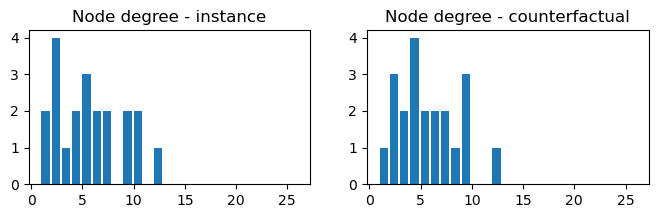

In [4]:
numero_istanze = 100

fig, axs = plt.subplots(1, 2, figsize=(8,2))

def update(i):
    num = 25
    
    for ax in axs:
        ax.clear()
    
    axs[0].hist(x['instances'][i].data.sum(axis=0), bins=range(1, num + 2), width=0.8)
    axs[1].hist(x['counterfactuals'][i].data.sum(axis=0), bins=range(1, num + 2), width=0.8)

    axs[0].set_title('Node degree - instance')
    axs[1].set_title('Node degree - counterfactual')
    
ani = FuncAnimation(fig, update, frames=numero_istanze, interval=300, repeat=False)
ani.save("prova.mp4", writer="ffmpeg", fps=3)
HTML(ani.to_jshtml())

Questo è fatto parecchio al volo per vedere le forme delle distribuzioni, se ne vale la pena posso lavorare per discriminare le due classi (cambiando lo sfondo come ho fatto anche per gli altri video) e per indicare se controfattuale e explainer sono accurati per la singola istanza

### Altre cose

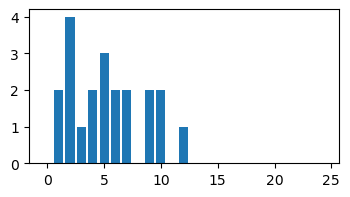

In [15]:
from collections import Counter

def distribuzione_gradi(grado_lista, max_grado=24):
    conteggi = Counter(grado_lista)
    distribuzione = [conteggi.get(grado, 0) for grado in range(max_grado + 1)]
    return distribuzione

plt.figure(figsize=(4,2))
plt.bar(list(range(25)), distribuzione_gradi(x["instances"][0].data.sum(axis=0)))
plt.show()